# Crude Oil (1996 - 2024)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf, month_plot,quarter_plot
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Crude Oil time series analysis/Crude_oil-(1996-2024).csv')

## Data Preprocessing

In [7]:
df['Price'] = df['Price'].apply(lambda x:abs(x))

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace = True)
df.sort_index(ascending = True, inplace = True)

# Exploration

### Crude Prices Info

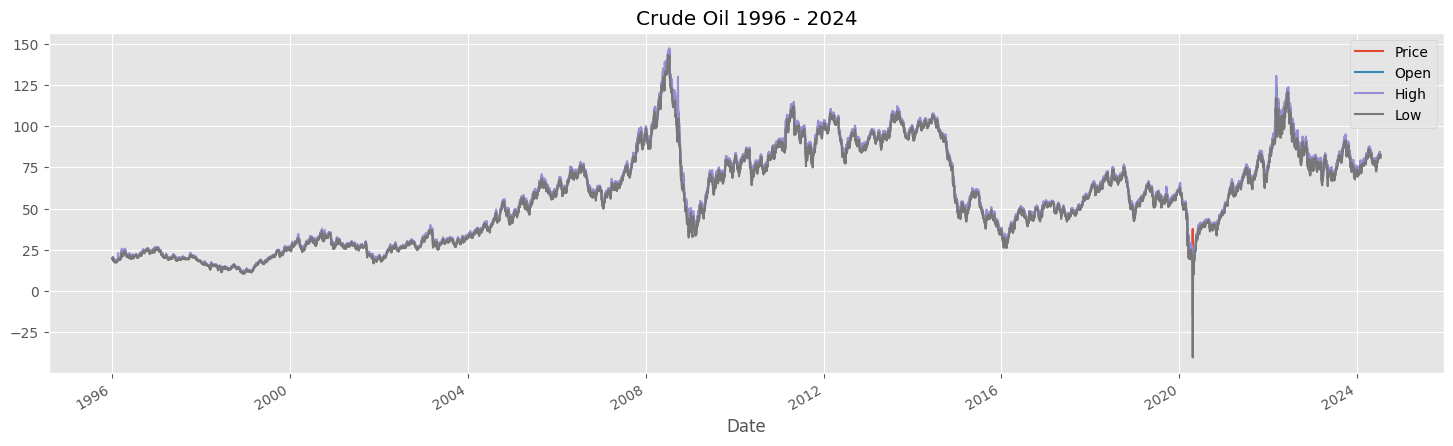

In [9]:
df.plot(figsize = (18,5), linestyle = 'solid')
plt.title('Crude Oil 1996 - 2024')
plt.show()

### Distribution

In [10]:
def dist_plot(df,col):
    fig,ax = plt.subplots(2,2,figsize = (18,8))

    sns.histplot(data = df, x = col[0], kde = True, ax = ax[0,0])
    ax[0,0].set_title(f"{col[0]}")
    sns.histplot(data = df, x = col[1], kde = True, ax = ax[0,1])
    ax[0,1].set_title(f"{col[1]}")
    sns.histplot(data = df, x = col[2], kde = True, ax = ax[1,0])
    ax[1,0].set_title(f"{col[2]}")
    sns.histplot(data = df, x = col[3], kde = True, ax = ax[1,1])
    ax[1,1].set_title(f"{col[3]}")
    plt.suptitle('Distribution of Crude Oils', fontsize = 18)
    plt.tight_layout()
    plt.show()

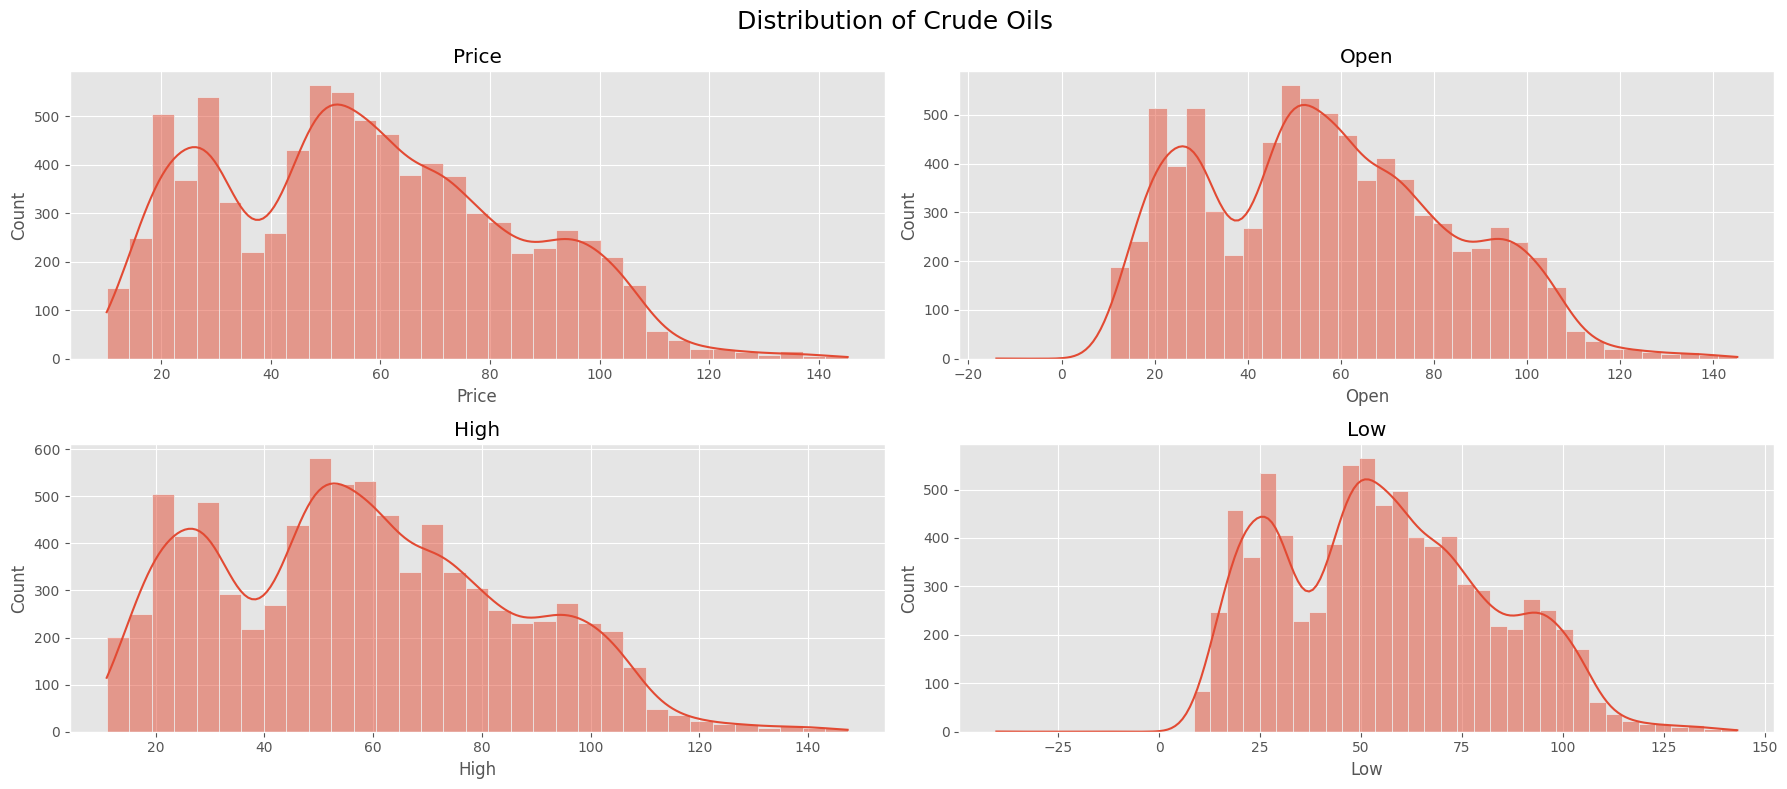

In [11]:
dist_plot(df=df, col = list(df.columns))

### Seasonal Decomposition

In [12]:
result = seasonal_decompose(df['Price'], model='multiplicative', two_sided=True, period=365)

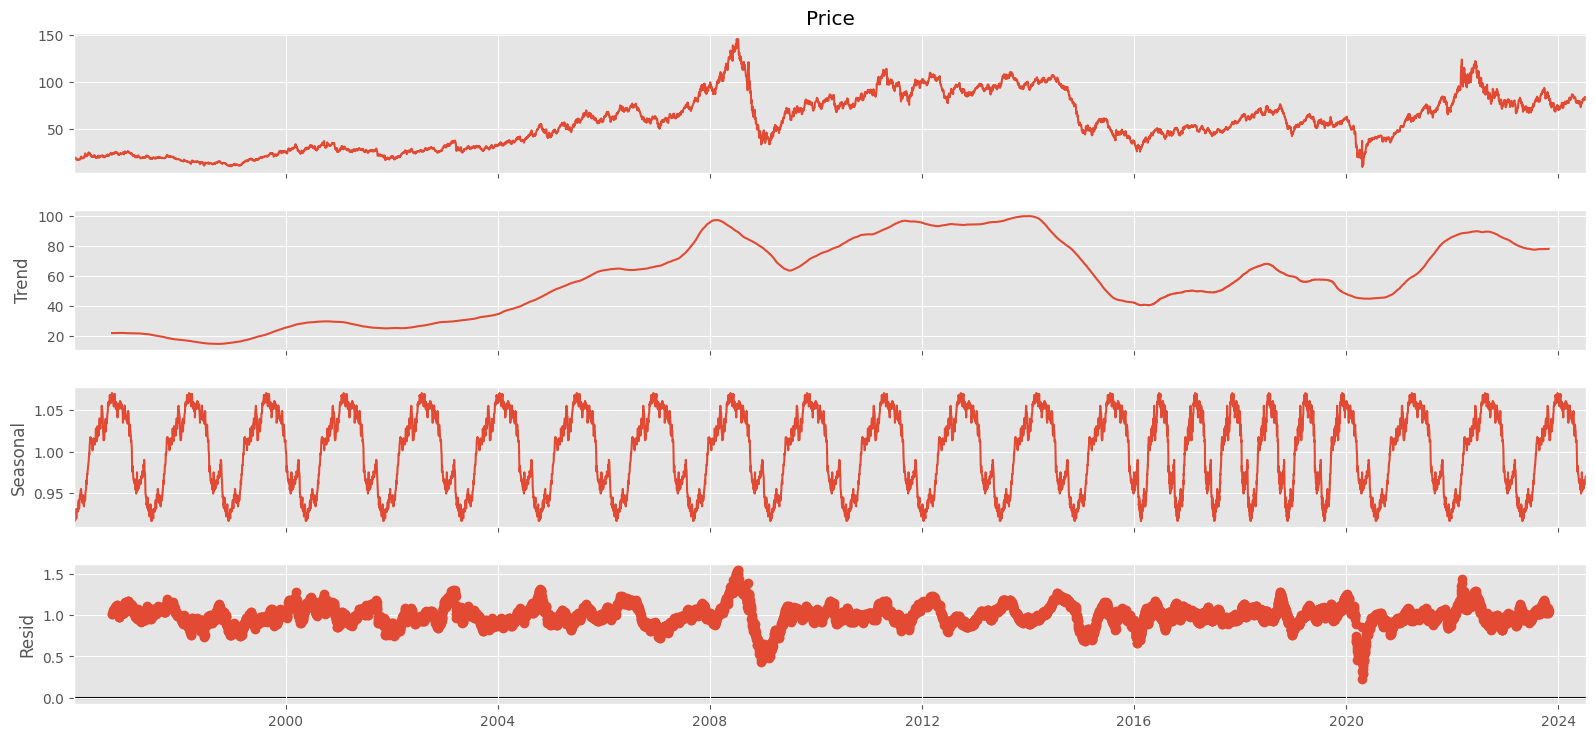

In [13]:
result.plot()
plt.gcf().set_size_inches(18, 8)  # Set the figure size (width, height)
plt.show()

### Quarterly and Monthly Plot

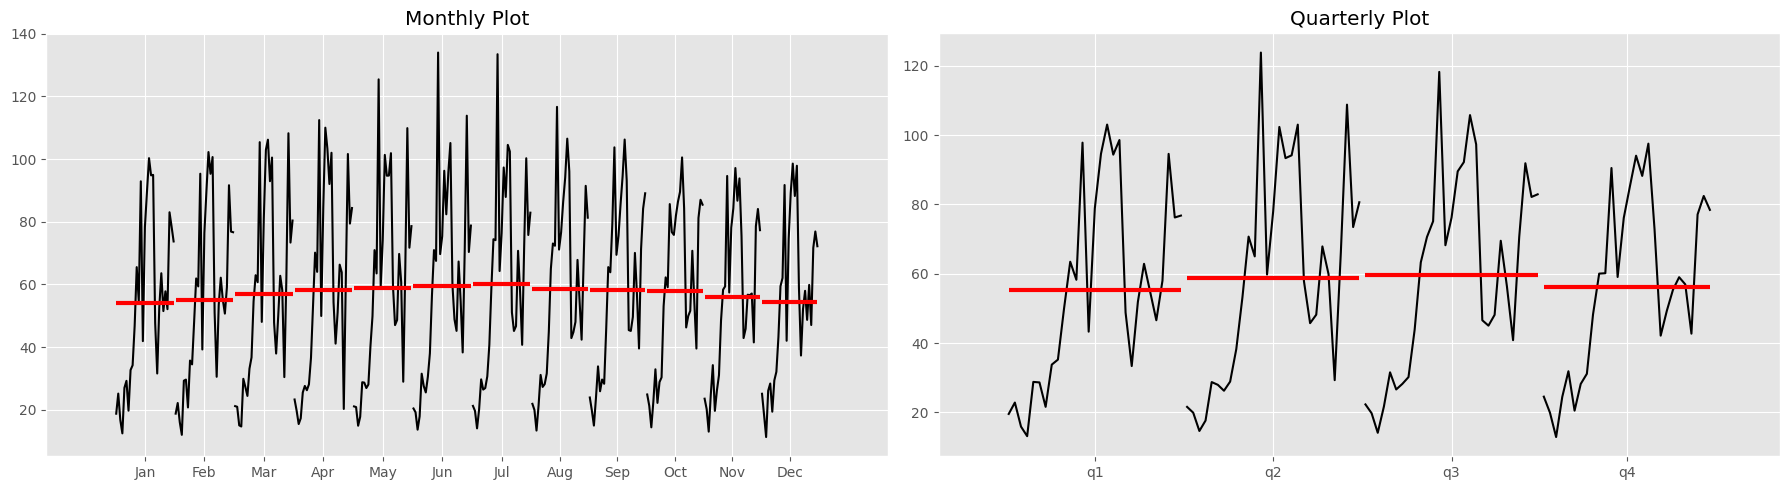

In [14]:
monthly_mean = df['Price'].resample('M').mean()
quarterly_mean = df['Price'].resample('Q').mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

month_plot(monthly_mean, ax=axes[0])
axes[0].set_title('Monthly Plot')
quarter_plot(quarterly_mean, ax=axes[1])
axes[1].set_title('Quarterly Plot')

plt.tight_layout()
plt.show()

# Modelling of Time Series

In [15]:
df = df[['Price']]
df = df[['Price']].resample('MS').mean()

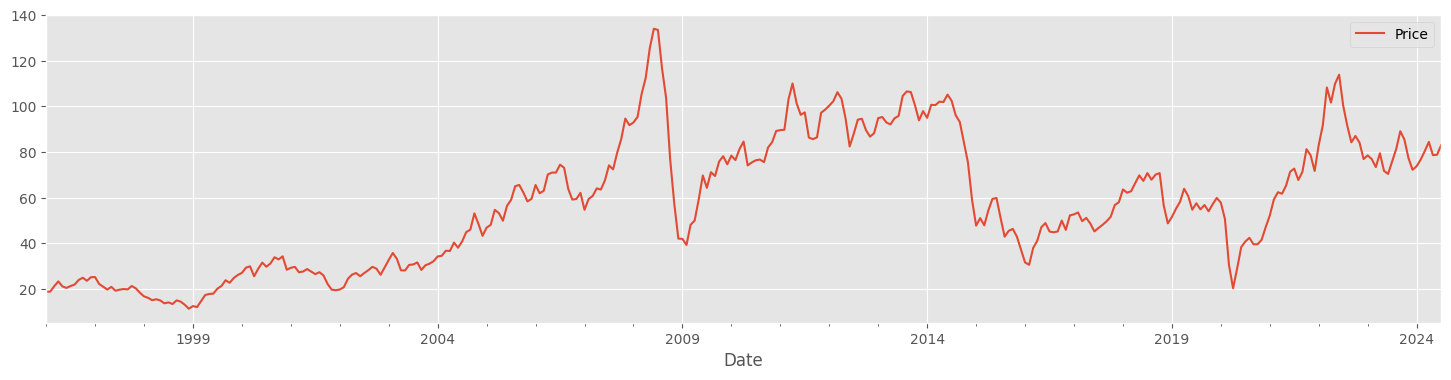

In [16]:
df.plot(figsize = (18,4))
plt.show()

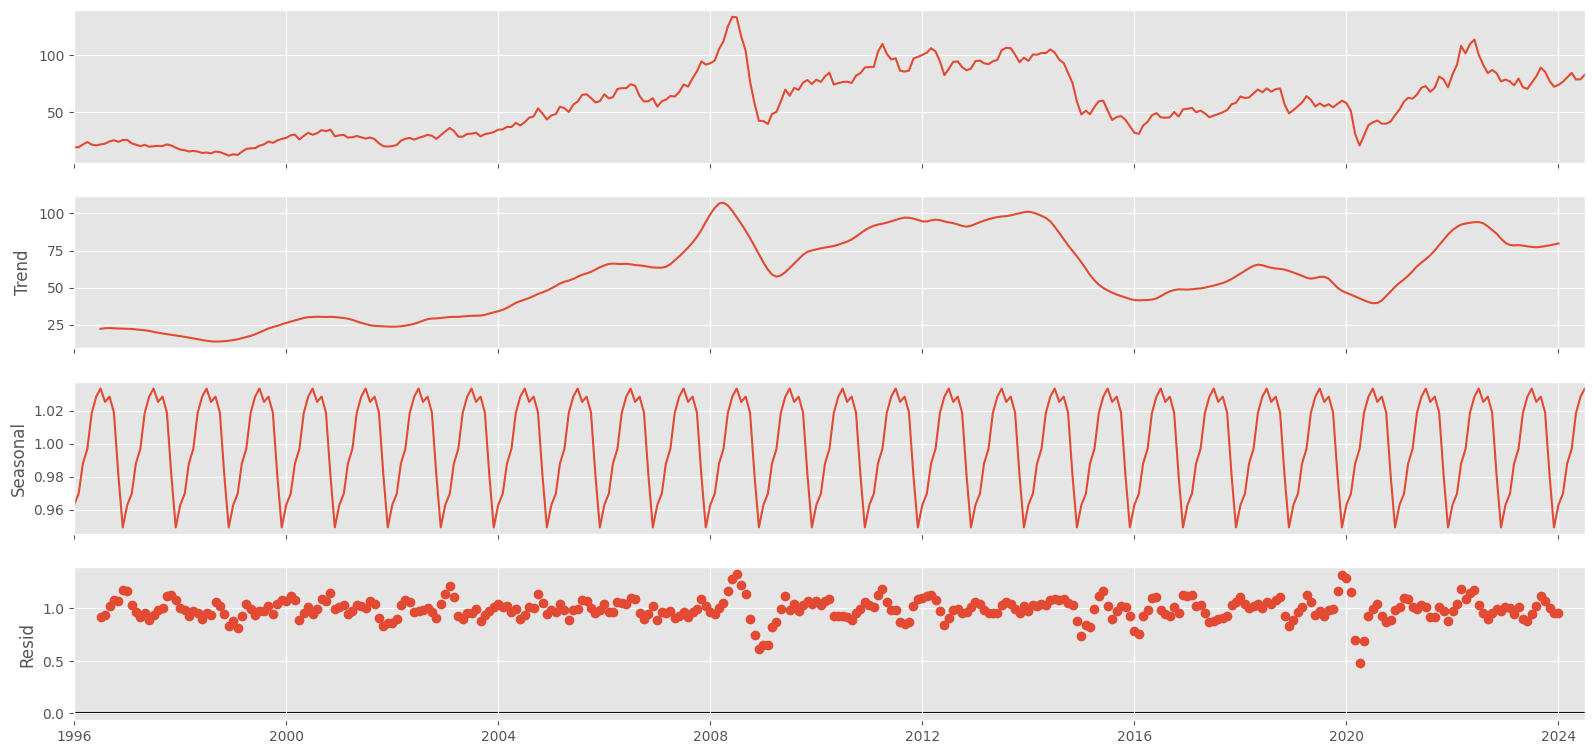

In [17]:
result = seasonal_decompose(df, model='multiplicative', two_sided=True, period=12)
result.plot()
plt.gcf().set_size_inches(18, 8)  # Set the figure size (width, height)
plt.show()

# Forecasting

In [18]:
date_split = '01-01-2017'
train = df[df.index < date_split] #train
test = df[df.index >=date_split] #test

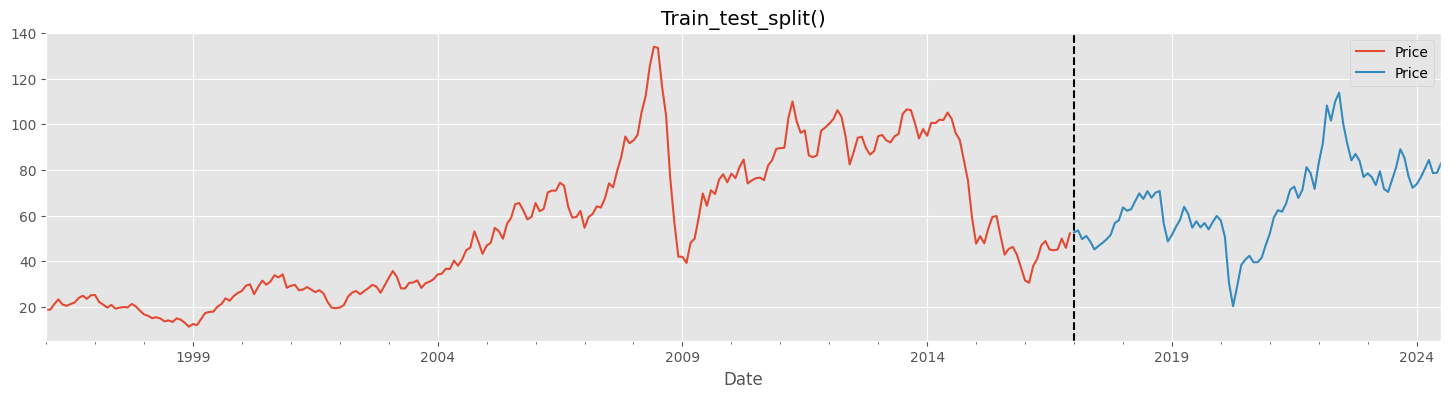

In [19]:
ax = train.plot(figsize=(18,4), label = 'Train')
test.plot(ax = ax, label = 'Test')
plt.axvline(x = date_split, color = 'black', ls = '--')
plt.legend()
plt.title('Train_test_split()')
plt.show()

### Adfuller Test

In [20]:
0.05 > adfuller(df)[1]

False

### PACF and ACF

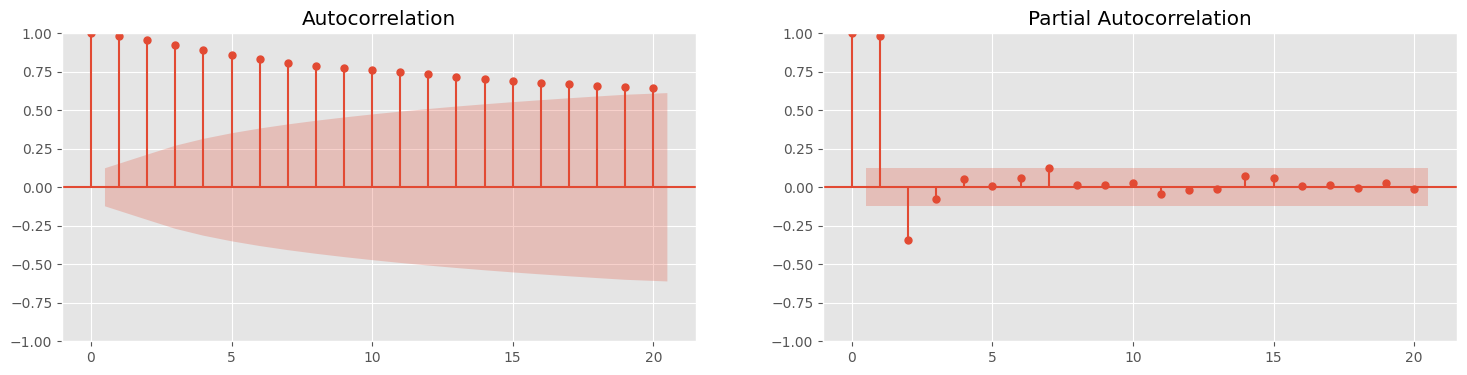

In [21]:
fig, ax = plt.subplots(1,2, figsize = (18,4))
plot_acf(train, lags = 20, ax = ax[0])
plot_pacf(train, lags = 20, ax = ax[1])
plt.show()

In [22]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.7 MB/s eta 0:00:00


In [23]:
from pmdarima import auto_arima

In [24]:
auto_arima(df, seasonal = True, m = 20, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[20] intercept   : AIC=2073.417, Time=13.63 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=2112.517, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=2073.327, Time=1.63 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=2077.905, Time=2.22 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=2110.949, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[20] intercept   : AIC=2071.453, Time=0.13 sec
 ARIMA(1,1,0)(0,0,1)[20] intercept   : AIC=2073.330, Time=2.26 sec
 ARIMA(1,1,0)(1,0,1)[20] intercept   : AIC=2075.315, Time=7.92 sec
 ARIMA(2,1,0)(0,0,0)[20] intercept   : AIC=2073.383, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[20] intercept   : AIC=2073.403, Time=1.24 sec
 ARIMA(0,1,1)(0,0,0)[20] intercept   : AIC=2076.054, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[20] intercept   : AIC=2068.045, Time=3.89 sec
 ARIMA(2,1,1)(1,0,0)[20] intercept   : AIC=2069.952, Time=14.26 sec
 ARIMA(2,1,1)(0,0,1)[20] intercept   : AIC=2069.955, Time=12.87 sec
 ARIMA(2,1,1)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  343
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1029.556
Date:                Sun, 28 Jul 2024   AIC                           2067.112
Time:                        16:19:06   BIC                           2082.451
Sample:                    01-01-1996   HQIC                          2073.223
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2840      0.049     26.295      0.000       1.188       1.380
ar.L2         -0.3674      0.038     -9.737      0.000      -0.441      -0.293
ma.L1         -0.9406      0.046    -20.465      0.000      -1.031      -0.851
sigma2        24.0958      1.447     16.649      0.000      21.259      26.932
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                52.90
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               4.91   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
model = SARIMAX(train, order = (3,1,2), seasonal_order = (2,0,1,12))
model = model.fit()

In [26]:
pred = model.predict(start=test.index[0], end=test.index[-1])

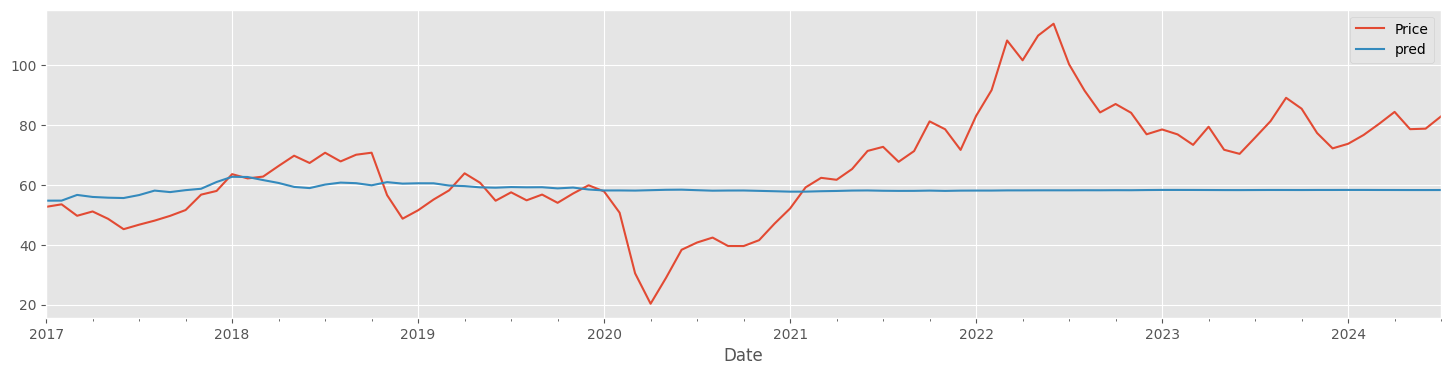

In [27]:
ax = test.plot(figsize= (18,4), label = 'test')
pred.plot(ax = ax, label = 'pred')
plt.legend()
plt.show()

In [39]:
pred = model.predict(df.index[-1], df.index[-1] + pd.DateOffset(months = 12))

In [29]:
df = pd.concat((df,pred)).fillna(0)

In [30]:
df['Price']=df['Price']+df[0]

In [31]:
df.drop(columns = [0], inplace = True)

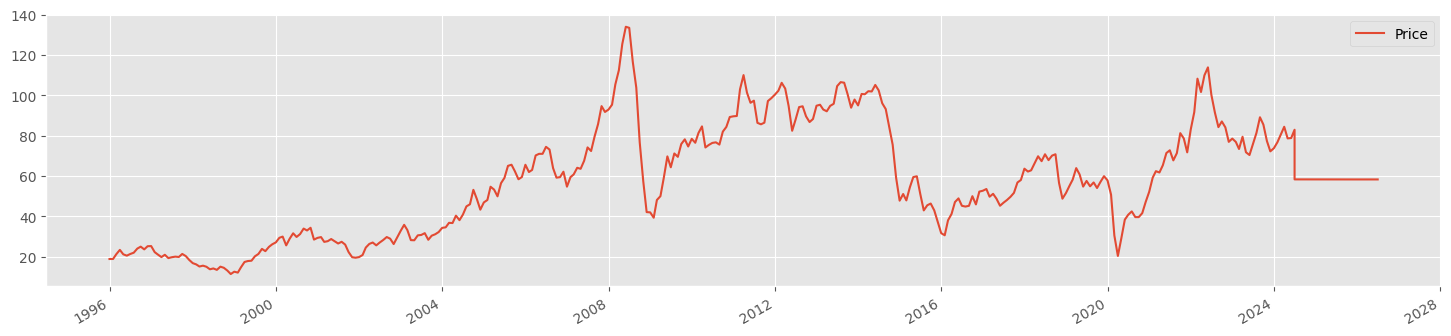

In [32]:
df.plot(figsize = (18,4))
plt.show()

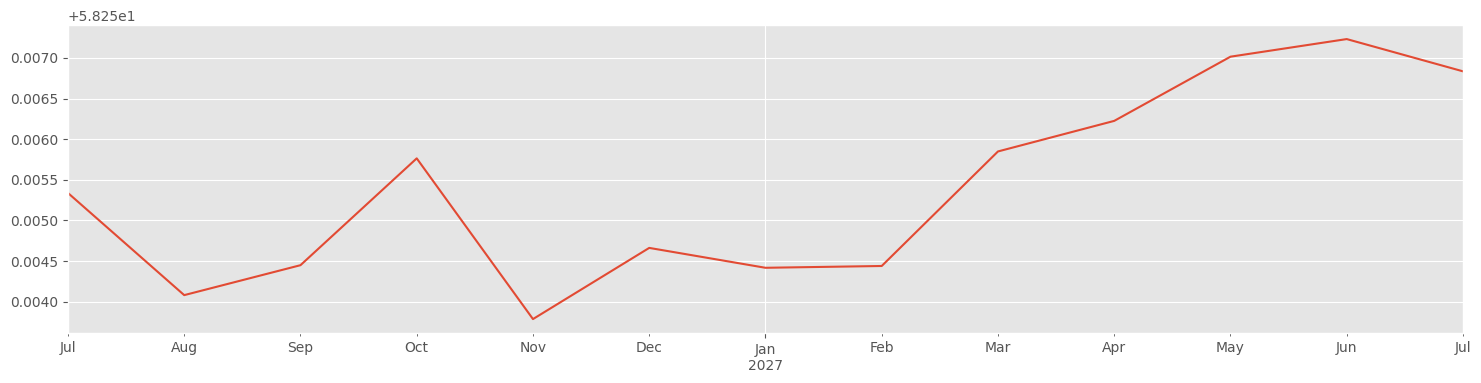

In [44]:
pred.plot(figsize = (18,4))

plt.show()